<a href="https://colab.research.google.com/github/Daria13-gif/cs102/blob/homework06/lab_3_2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

    1. Загрузите датасет music_genre.csv.
    2. Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)
    3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
    4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.



In [2]:
# Загрузите датасет music_genre.csv
library(dplyr)
df <- read.csv('music_genre.csv')

# Возьмите 20 тысяч случайных строк из датасета
df <- sample_n(df, 20000)

# проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их
df <- distinct(df)

# строки, в которых значение в столбце artist_name – empty_field - удалить
nrow(df[df$artist_name == 'empty_field', ])
new_df <- subset(df, artist_name!='empty_field')
new_df <- na.omit(new_df)
new_df

[1] 979

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,45372,Dean Martin,Ain't That A Kick In The Head,58,0.604000,0.586,147293,0.2530,0.00e+00,F#,0.3000,-11.930,Minor,0.0538,108.16799999999999,1-Apr,0.7180,Jazz
2,82195,Dashboard Confessional,Vindicated,57,0.032800,0.517,201347,0.7900,0.00e+00,G#,0.0840,-3.334,Major,0.0323,85.98299999999999,4-Apr,0.3570,Rock
3,25521,Project Destati,Unbreakable Chains,23,0.655000,0.328,186400,0.4420,9.55e-01,D,0.0694,-11.501,Minor,0.0341,130.028,4-Apr,0.1730,Anime
4,41334,Mud Digger,"Backroads Life (feat. Charlie Farley, Demun Jones & The Lacs)",43,0.204000,0.662,313481,0.8050,0.00e+00,C,0.1960,-6.345,Major,0.0563,136.055,4-Apr,0.6220,Country
5,51936,Run The Jewels,Angel Duster,41,0.003090,0.527,309173,0.8250,3.63e-06,F#,0.3640,-6.771,Major,0.0861,175.765,5-Apr,0.1920,Alternative
6,68027,Arctic Monkeys,Dancing Shoes,50,0.003280,0.522,141133,0.8890,0.00e+00,C#,0.3450,-4.137,Major,0.0461,144.499,4-Apr,0.8520,Rock
7,23175,Dirt Rock Empire,Next Time It's 3AM,43,0.008080,0.607,157730,0.6960,0.00e+00,F#,0.1260,-7.290,Major,0.0273,93.993,4-Apr,0.6890,Country
8,43186,SZA,The Weekend - Funk Wav Remix,76,0.495000,0.775,171806,0.5730,0.00e+00,B,0.1260,-4.933,Major,0.0585,101.925,4-Apr,0.6670,Hip-Hop
9,72540,Neil Young,Rockin' In The Free World,63,0.000736,0.491,281853,0.8830,3.19e-05,E,0.3690,-4.986,Minor,0.0306,131.75,4-Apr,0.5180,Rock


Задание 2

    1. Выведите долю каждого жанра в датасете.
    2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
    3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
    4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).


In [ ]:
# Выведите долю каждого жанра в датасете
new_df <- na.omit(new_df)
genre_props <- prop.table(table(df$music_genre))

cat("Доля каждого жанра в датасете:\n")
print(genre_props)

Доля каждого жанра в датасете:

            Alternative       Anime       Blues   Classical     Country 
    0.00005     0.10030     0.10130     0.09930     0.09950     0.10140 
 Electronic     Hip-Hop        Jazz         Rap        Rock 
    0.10040     0.09835     0.09875     0.10255     0.09810 


In [ ]:
# Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам    
new_df <- na.omit(new_df)
genre_count <- new_df %>%
  count(music_genre) %>%
  mutate(share = n / sum(n)) %>%
  arrange(desc(share))
genre_count

music_genre,n,share
<chr>,<int>,<dbl>
Rap,1948,0.10240774
Country,1943,0.10214488
Electronic,1928,0.10135632
Anime,1909,0.10035748
Alternative,1901,0.09993692
Jazz,1897,0.09972663
Blues,1885,0.09909578
Classical,1879,0.09878036
Hip-Hop,1869,0.09825465


In [ ]:
# самый танцевальный жанр
danceability_by_genre <- new_df %>% 
  group_by(music_genre) %>% 
  summarize(mean_danceability = mean(danceability))

most_danceable_genre <- danceability_by_genre %>% 
  arrange(desc(mean_danceability)) %>% 
  head(1)

cat("Самый танцевальный жанр:", most_danceable_genre$music_genre, "\n")
cat("Среднее значение показателя danceability:", most_danceable_genre$mean_danceability, "\n")

Самый танцевальный жанр: Hip-Hop 
Среднее значение показателя danceability: 0.7190396 


In [7]:
import ggplot
# Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше
new_df <- na.omit(new_df)
tonality_by_genre <- new_df %>%
  group_by(music_genre, key) %>%
  summarise(track_count = n()) %>%
  mutate(mode = ifelse(sum(key == "C") == 0 & sum(key == "D") == 0, "No tracks",
                       ifelse(track_count[key == "C"] < track_count[key == "D"], "major", "minor")))

ggplot(tonality_by_genre, aes(x = music_genre, y = track_count, fill = mode)) +
  geom_bar(stat = "identity") +
  labs(title = "Преобладающая тональность по жанрам", 
       x = "Жанры", y = "Количество треков") +
  scale_fill_manual(values = c("#377eb8", "#e41a1c", "#999999"), 
                    labels = c("мажор", "минор")) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

ERROR: ignored

Задание 3

    1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
    2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.


In [ ]:
# Выведите исполнителя, у которого больше всего треков в датасете
new_df <- na.omit(new_df)
most_tracks <- names(sort(table(new_df$artist_name), decreasing = TRUE)[1])
most_count <- max(table(new_df$artist_name))
cat("Исполнитель с наибольшим количеством треков:", most_tracks, "(", most_count, "треков)\n")

least_tracks <- names(sort(table(new_df$artist_name))[1])
least_count <- min(table(new_df$artist_name))
cat("Исполнитель с наименьшим количеством треков:", least_tracks, "(", least_count, "трек)\n")

Исполнитель с наибольшим количеством треков: Nobuo Uematsu ( 173 треков)
Исполнитель с наименьшим количеством треков: ? & The Mysterians ( 1 трек)


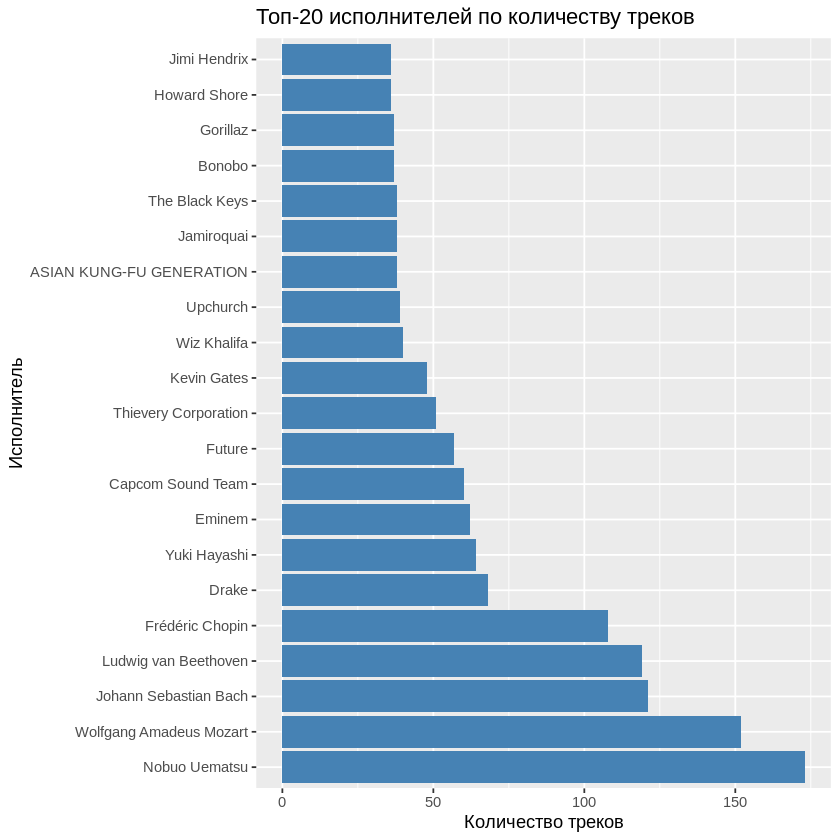

In [ ]:
# Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей
library(ggplot2)

top_artists <- new_df %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.y = element_text(hjust = 1)) +
  ggtitle("Топ-20 исполнителей по количеству треков") +
  xlab("Количество треков") +
  ylab("Исполнитель")

Задание 4

    1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
    2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,68287,72,0.2030,0.831,244340,0.514,1.56e-04,0.1150,-6.695,0.0368,0.3970
2,46765,28,0.9400,0.218,1050893,0.117,8.61e-01,0.1500,-18.585,0.0489,0.0599
3,66329,56,0.0351,0.737,221700,0.684,1.32e-05,0.0813,-7.876,0.1640,0.3520
4,49070,30,0.0255,0.709,223241,0.766,3.90e-04,0.0892,-5.871,0.1090,0.4300
5,36425,11,0.4960,0.642,389667,0.655,7.88e-01,0.3200,-7.520,0.0317,0.2080
6,43733,64,0.0158,0.579,193372,0.778,0.00e+00,0.1010,-5.933,0.1640,0.4670


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000,0.007,-0.003,-0.003,-0.001,0.014,-0.015,0.015,0.012,-0.006,0.009
popularity,0.007,1.000,-0.289,0.362,-0.081,0.213,-0.369,-0.038,0.323,0.233,0.116
acousticness,-0.003,-0.289,1.000,-0.347,0.066,-0.792,0.390,-0.100,-0.730,-0.168,-0.268
danceability,-0.003,0.362,-0.347,1.000,-0.155,0.266,-0.308,-0.045,0.395,0.278,0.432
duration_ms,-0.001,-0.081,0.066,-0.155,1.000,-0.071,0.125,0.014,-0.102,-0.089,-0.136
energy,0.014,0.213,-0.792,0.266,-0.071,1.000,-0.385,0.180,0.838,0.167,0.391


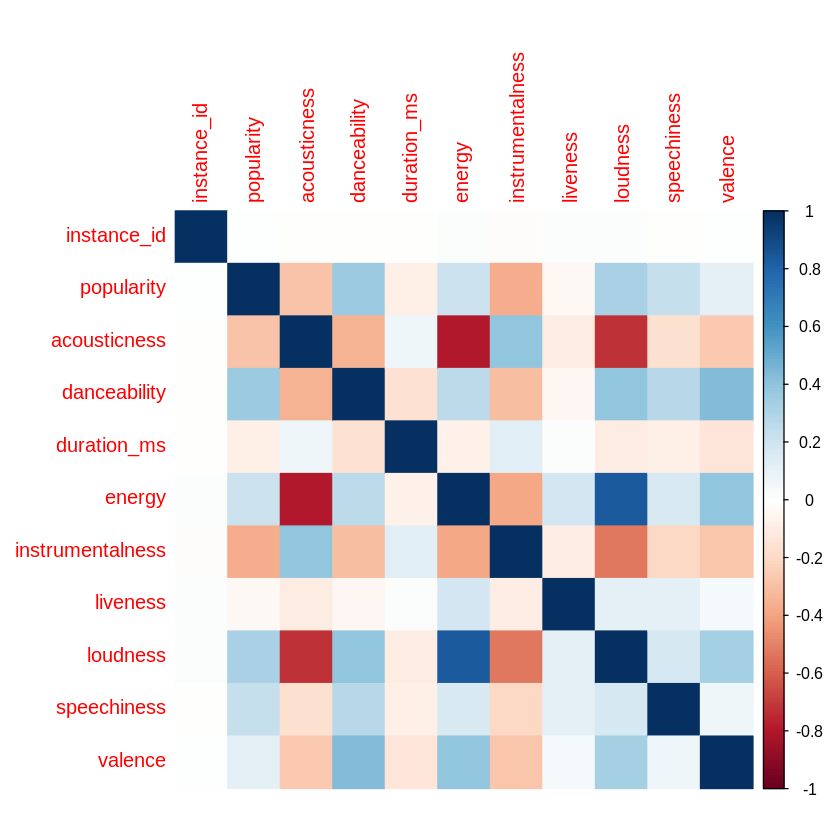

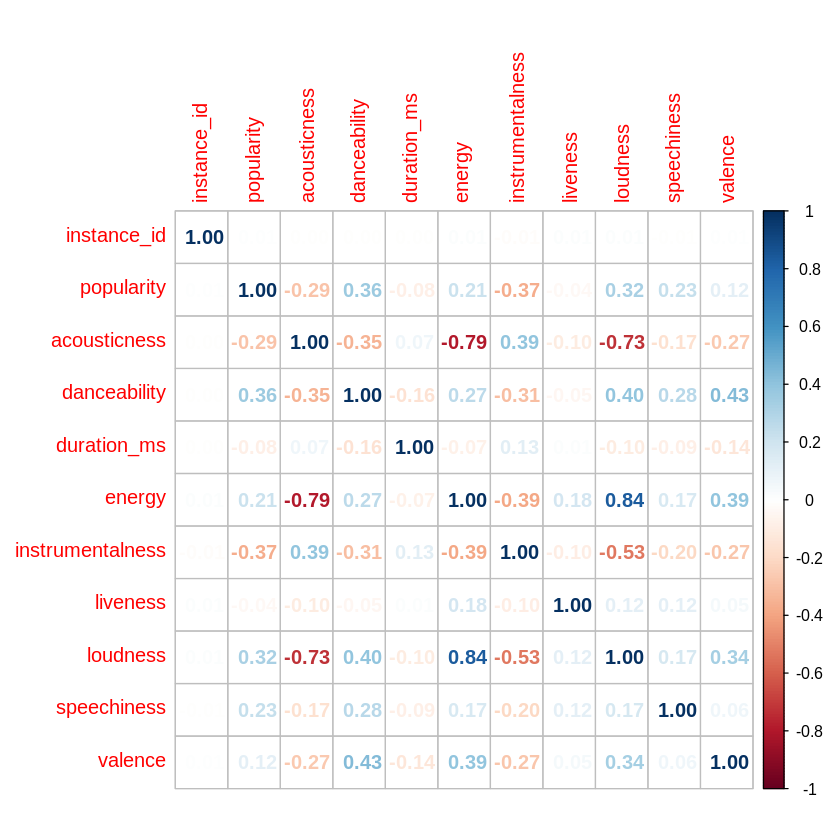

In [ ]:
# Постройте корреляционную матрицу для характеристик треков
new_df <- na.omit(new_df)
install.packages("corrplot")
library(corrplot)

cor_df <- select_if(new_df, is.numeric)
head(cor_df)
# correlation matrix
M<-cor(cor_df, use="pairwise.complete.obs")
head(round(M,3))

# as colour
corrplot(M, method="color")
 
# as number
corrplot(M, method="number")

In [ ]:
# Посчитайте корреляцию между популярностью (popularity) и длиной названия трека
cor_df <- select_if(new_df, is.numeric)
cat(cor(new_df$popularity, new_df$duration_ms, use = "complete.obs"))

-0.08388737

Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

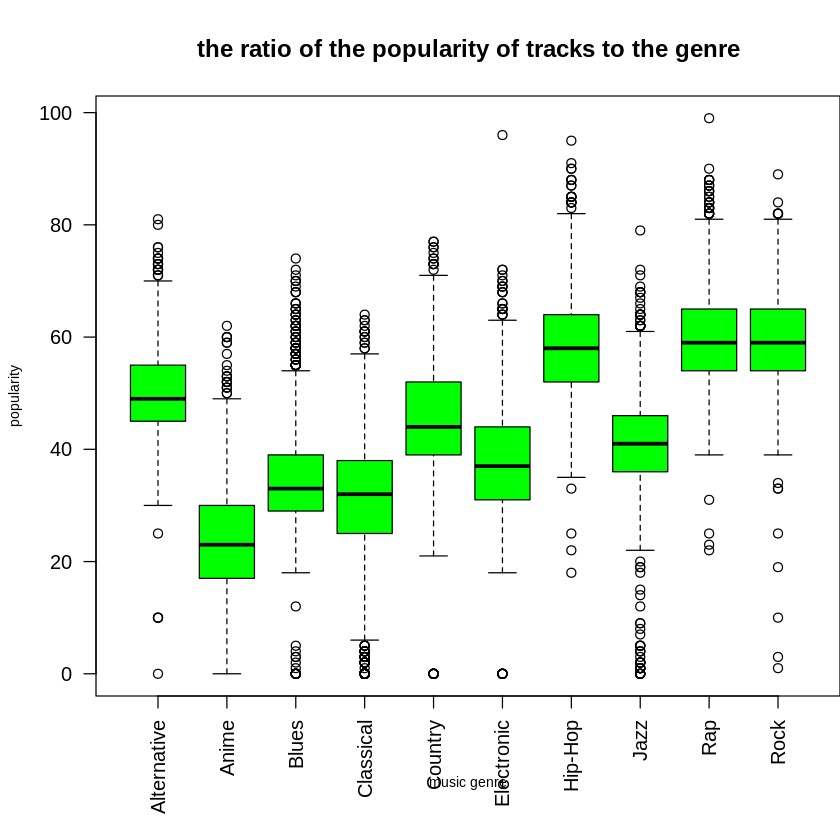

In [ ]:
# Покажите на ящиковой диаграмме отношение популярности треков к жанру
par(mar=c(6,4,4,0))
boxplot(popularity ~ music_genre, data = new_df,
        las=2,
        xlab = "music genre",
        ylab = "popularity",
        main = "the ratio of the popularity of tracks to the genre",
        col = "green",
        cex.lab=0.7)

Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.


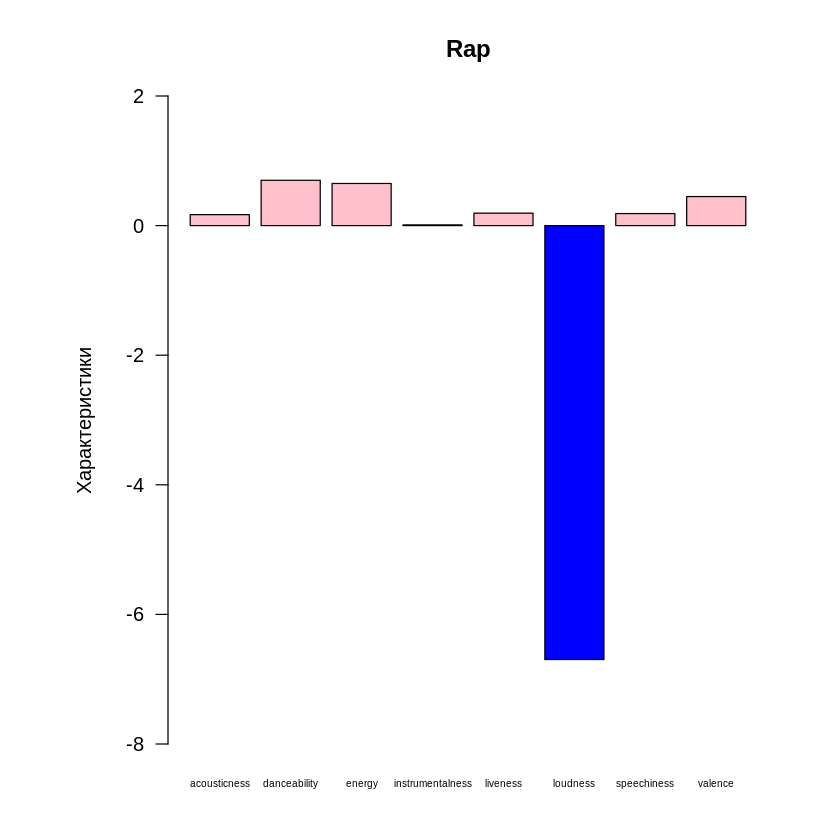

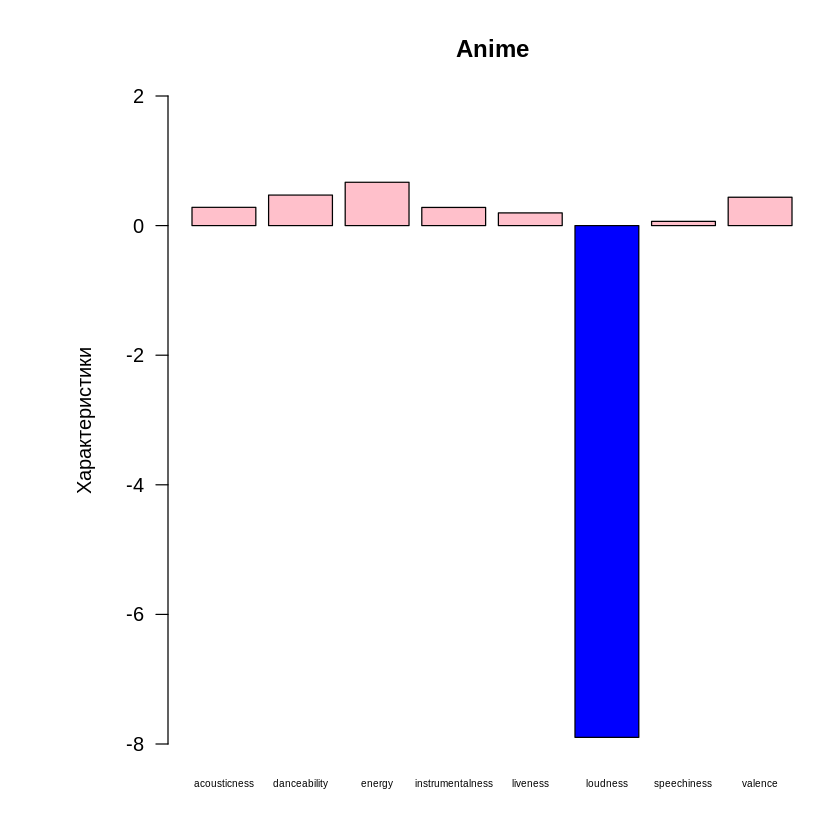

In [ ]:
new_df <- na.omit(new_df)
df <- new_df
grouped <- df %>% group_by(music_genre)  %>%
                      summarise(status = mean(popularity))  # складываем тот же датасет, сгруппированный по жанрам и средним значениям популярности

most_popular <- (grouped %>% filter(max(status) == status))[[1]]
least_popular <- (grouped %>% filter(min(status) == status))[[1]]  #Находим по табличке самый популярный и самый непопулярный жанр с помощью фильтрации и извлекаем строки с этими жанрами из датасета
ee <- subset(df, music_genre == most_popular)
yy <- subset(df, music_genre == least_popular)

ee <- ee[,!names(ee) %in% c("instance_id", "popularity", "duration_ms")]
yy <- yy[,!names(yy) %in% c("instance_id", "popularity", "duration_ms")]

ee <- ee[ , unlist(lapply(ee, is.numeric))]    # Identify numeric columns
yy <- yy[ , unlist(lapply(yy, is.numeric))] 

X <- as.numeric(unlist(colMeans(ee)))  # Извлекаем для таблицы самого популярного жанра средние значения по каждому столбцу и названия столбцов
Y <- names(unlist(colMeans(ee)))

colors = list()
for(i in 1:length(X)) {                                    
  if (X[i] < 0) {
    colors[[length(colors) + 1]] <- 'blue'
  } else {
    colors[[length(colors) + 1]] <- 'pink'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,3))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=most_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

X <- as.numeric(unlist(colMeans(yy)))
Y <- names(unlist(colMeans(yy)))

colors = list()
for(i in 1:length(X)) {                                    
  if (X[i] < 0) {
    colors[[length(colors) + 1]] <- 'blue'
  } else {
    colors[[length(colors) + 1]] <- 'pink'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,1))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=least_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

Задание 8

    1. Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
    2. Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
    3. На круговой диаграмме покажите численное соотношение треков разной длительности.



In [ ]:
library(ggplot2)

# Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая", "средняя", "длинная"
new_df$длительность_трека <- cut(new_df$duration_ms/1000/60, 
                                      breaks = c(0, 3, 5, Inf), 
                                      labels = c("короткая", "средняя", "длинная"))
new_df <- subset(new_df, длительность_трека!='NA')
#new_df$длительность_трека

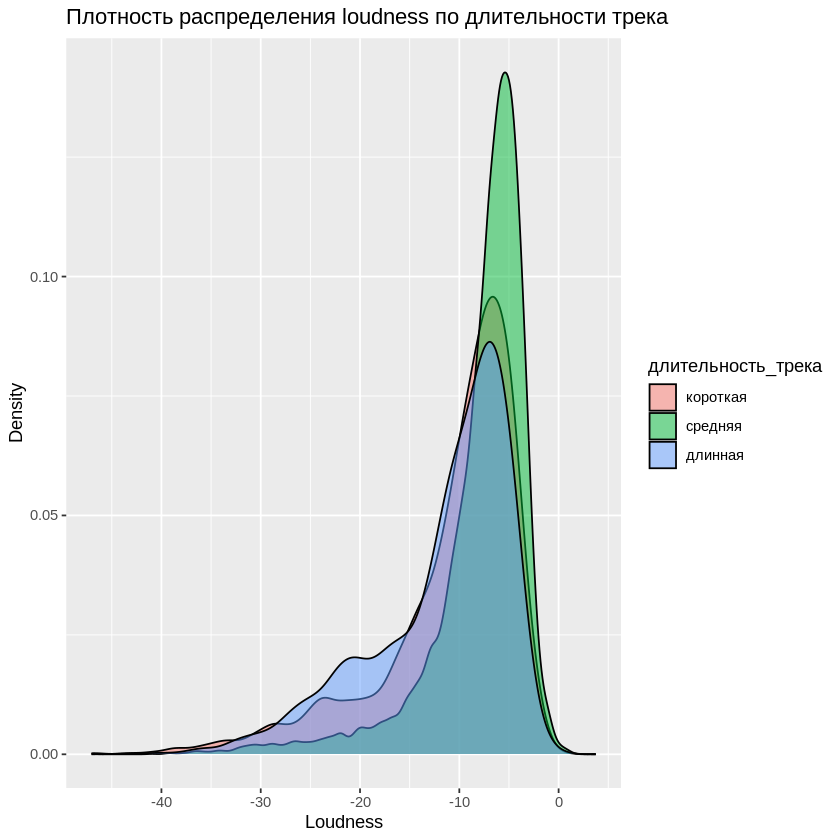

In [ ]:
# Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности
#head(new_df)
ggplot(new_df, aes(x = loudness, fill = длительность_трека)) + 
  geom_density(alpha = 0.5) +
  xlab("Loudness") +
  ylab("Density") +
  ggtitle("Плотность распределения loudness по длительности трека")

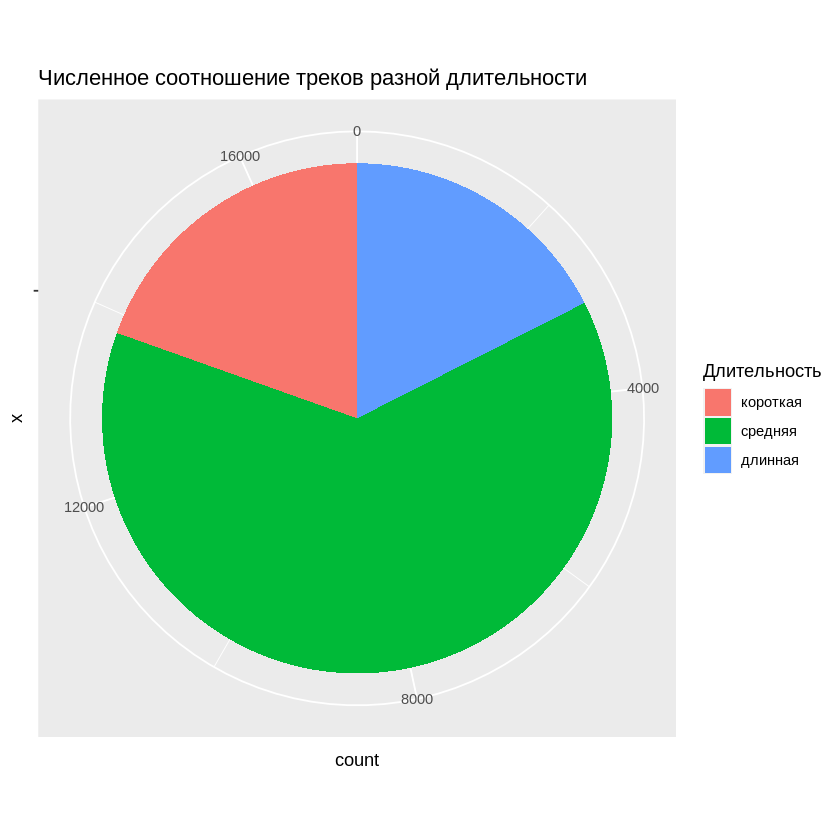

In [ ]:
# На круговой диаграмме покажите численное соотношение треков разной длительности
#head(new_df)
ggplot(new_df, aes(x = "", fill = длительность_трека)) + 
  geom_bar(width = 1) +
  coord_polar("y", start=0) +
  labs(fill = "Длительность") +
  ggtitle("Численное соотношение треков разной длительности")